In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [46]:
##Using these Libraries we can perform the nessecary Steps for Data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Using pandas we can read files to perform EDA.

In [47]:
## Using Pandas we can read files like csv to perform EDA(exploratry data anlaysis)
df= pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [48]:
## Using head function to show the top 5 rows in data by default 
## and in brackets you can write the number of rows you want to access 
## like in the below situation we have used 10 to show top 10 rows from the above
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [49]:
## Using shape function to get a brief idea about the number of collumns and rows in a dataset
## gives result as numbers where the first number will denote the rows and the other number is the columns 
df.shape

(8807, 12)

In [50]:
## Using info function to get a small table from dataset which consists of the column name,
##  no of non-null data and the type of data which the column consists of like (int64,string, object) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [51]:
## Using the describe function we can use get a small table where it gives out diffrent types 
## of measures for all the data in a column like (count,mean,standard deviation, minimum, maximum)

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [52]:
## Using isna funtion to point out whether the data in rows & column is null or not.
## It reuturns in boolean format(True,False) of that particular 
##table and to using sum function with isna to get the sum of all true data in a column
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [53]:
## Using drop duplicates to drop the items in a specific column which is already present in the table  
df.drop_duplicates('show_id', keep='first', inplace=True)

In [54]:
## Using == to get data specific or Particular to the data which is written afterward the == sign 
## it will filter the data which is exact same the data mentioned after ==
df[df['country']=='United States']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [55]:
## Using the replace function to replace data which we want to change with someother data
## we just need to mention the data we want to replace and then use : sign and then in ''
## we just need to enter the data we want to replace it with
df.replace({'United States':'USA'},inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,USA,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",USA,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",USA,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",USA,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [56]:
## Using mean we can find the mean of data in a list
## in the below case we have derived our list from the release year column of the dataset
df["release_year"].mean()

2014.1801975701146

In [57]:
## Using fillna to replace the present null values in a specific column to something we want inplace of 
##  the null values which are present currently . In the below example we have replaced null data of 
## director to Not Available or N/A
df['director'].fillna(value='N/A',inplace= True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,USA,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,N/A,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,N/A,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,N/A,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",USA,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,N/A,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",USA,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",USA,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [58]:
## We have done the same here we have filled the null data of country with N/A
df['country'].fillna(value='N/A',inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,USA,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,N/A,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",N/A,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,N/A,NaN,N/A,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,N/A,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",USA,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,N/A,NaN,N/A,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",USA,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",USA,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [59]:
## Using unique function to find all the data which are unique in the a list as in the
## below case we can find all the unique kind of rating which is been given to a TV show/ Movies
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [60]:
## Using value_count function to get a table of counts of unique data which is inside of a column 
## in a dataset. Below here we can have of the count of rating which been given to various TV Shows/Movies
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [61]:
## Again we have used == symbol to filter out all the data which has relaese_year of the year 1990
df[df['release_year']==1990]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
144,s145,Movie,House Party,Reginald Hudlin,"Christopher Reid, Christopher Martin, Robin Ha...",USA,"September 1, 2021",1990,R,104 min,"Comedies, Cult Movies","Grounded by his strict father, Kid risks life ..."
1251,s1252,Movie,Dances with Wolves,Kevin Costner,"Kevin Costner, Mary McDonnell, Rodney Grant, G...","United States, United Kingdom","March 1, 2021",1990,PG-13,181 min,"Action & Adventure, Classic Movies, Dramas","On the frontier, a Civil War soldier bonds wit..."
1621,s1622,Movie,Quigley Down Under,Simon Wincer,"Tom Selleck, Laura San Giacomo, Alan Rickman, ...","Australia, United States","December 1, 2020",1990,PG-13,120 min,Action & Adventure,"After traveling to Australia for a job, a shar..."
1861,s1862,Movie,Dil,Indra Kumar,"Aamir Khan, Madhuri Dixit, Saeed Jaffrey, Deve...",India,"October 12, 2020",1990,TV-14,165 min,"Comedies, Dramas, International Movies",A miser’s scheme to set his son up with a mill...
2317,s2318,Movie,Total Recall,Paul Verhoeven,"Arnold Schwarzenegger, Rachel Ticotin, Sharon ...","United States, Mexico","July 1, 2020",1990,R,114 min,"Action & Adventure, Sci-Fi & Fantasy","After getting a memory implant, working stiff ..."
2715,s2716,Movie,Agneepath,Mukul Anand,"Amitabh Bachchan, Mithun Chakraborty, Danny De...",India,"April 1, 2020",1990,TV-14,174 min,"Dramas, International Movies",A boy grows up to become a gangster in pursuit...
4244,s4245,Movie,Tim Allen: Men Are Pigs,Ellen Brown,Tim Allen,USA,"December 31, 2018",1990,TV-MA,30 min,Stand-Up Comedy,Standup comedian Tim Allen delivers a set dedi...
5945,s5946,Movie,In Defense of a Married Man,Joel Oliansky,"Judith Light, Michael Ontkean, Jerry Orbach, P...",USA,"October 1, 2011",1990,TV-14,94 min,Dramas,A lawyer's husband is having an affair. When h...
5951,s5952,Movie,Unspeakable Acts,Linda Otto,"Jill Clayburgh, Brad Davis, Sam Behrens",USA,"October 1, 2011",1990,TV-14,95 min,Dramas,Laurie and Joseph are doctors who interview se...
6704,s6705,Movie,"Escape from the ""Liberty"" Cinema",Wojciech Marczewski,"Janusz Gajos, Zbigniew Zamachowski, Teresa Mar...",Poland,"October 1, 2019",1990,TV-MA,88 min,"Comedies, Dramas, Independent Movies",Artistic rebellion ignites at the movies when ...


In [62]:
## Using nunique we can find the count of unique data present in a column or lists
## Below here we have used nunique to count the no of unique values rating column has
df['rating'].nunique()

17

In [63]:
## Using = symbol we have assinged data to a specific to a category and created a new tables where 
## where netflix_shows will contain all the data from first table where type of data is TV Shows &
## netflix_movie contains all the data from the first table where type of data is Movie
netflix_shows= df[df['type']=='TV Show']
netflic_movie=df[df['type']=='Movie']

In [64]:
## Using plt.figure we are plotting a figure to use it for visualization of data 
plt.figure(figsize=(10,6), dpi=150)

<Figure size 1500x900 with 0 Axes>

<Figure size 1500x900 with 0 Axes>

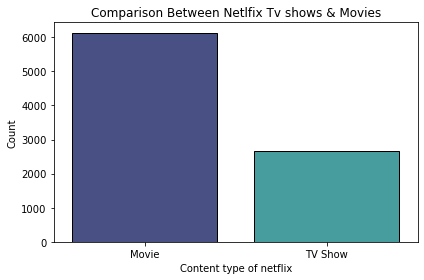

In [65]:
## Here we are using diffrent kind of funtions to create a countplot (bar graph) where we have
## TV Shows and Movies side by side to count how much movies and TV shows have been there on netflix
## to compare what number amounts for movie and what amounts for TV Shows

ax=sns.countplot(x='type',data= df,palette='mako', linewidth=1,edgecolor='black')
plt.xlabel('Content type of netflix')
plt.ylabel('Count')
plt.title('Comparison Between Netlfix Tv shows & Movies')
plt.tight_layout()
plt.show()